## 网络安全大作业

In [2]:
from pprint import pprint
import matplotlib.pyplot as plt
from bat import bro_log_reader
from bat.log_to_dataframe import LogToDataFrame
import numpy as np
import pandas as pd

import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;


### 网络扫描检测

In [3]:
def deal_with_conn_log(path):
    bro_df = LogToDataFrame(path)
    bro_df = bro_df.drop(['id.orig_h','id.resp_h','tunnel_parents','uid'],axis=1)
    bro_df["conn_state"] = bro_df["conn_state"].astype('category')
    bro_df["conn_state"]  = bro_df["conn_state"].cat.codes
    bro_df["history"] = bro_df["history"].astype('category')
    bro_df["history"]  = bro_df["history"].cat.codes
    bro_df["local_orig"] = bro_df["local_orig"].astype('category')
    bro_df["local_orig"]  = bro_df["local_orig"].cat.codes
    bro_df["local_resp"] = bro_df["local_resp"].astype('category')
    bro_df["local_resp"]  = bro_df["local_resp"].cat.codes
    bro_df["service"] = bro_df["service"].astype('category')
    bro_df["service"]  = bro_df["service"].cat.codes
    bro_df["proto"] = bro_df["proto"].astype('category')
    bro_df["proto"]  = bro_df["proto"].cat.codes
    bro_df = bro_df.reset_index(drop=True)
    bro_df["timestamp"] = [tm / np.timedelta64(1, 's') for tm in bro_df.ix[:,"duration"]]
    bro_df = bro_df.drop(['duration'],axis=1)
    return bro_df


In [4]:
abnormal_df = deal_with_conn_log("conn.log")
normal_df =  deal_with_conn_log("conn_normal.log")

Successfully monitoring conn.log...
Successfully monitoring conn_normal.log...


In [5]:
normal_df["label"] = [ 0 for x in normal_df.ix[:,"conn_state"]]
abnormal_df["label"] = [ 1 for x in abnormal_df.ix[:,"conn_state"]]

In [6]:
df_data = pd.concat([normal_df,abnormal_df])

In [7]:
df_data = df_data.sample(frac=1).reset_index(drop=True)

In [8]:
df_data.dtypes

conn_state          int8
history             int8
id.orig_p          int64
id.resp_p          int64
local_orig          int8
local_resp          int8
missed_bytes       int64
orig_bytes         int64
orig_ip_bytes      int64
orig_pkts          int64
proto               int8
resp_bytes         int64
resp_ip_bytes      int64
resp_pkts          int64
service             int8
timestamp        float64
label              int64
dtype: object

In [9]:
test_df = df_data.ix[:1500,:].reset_index(drop=True)
train_df= df_data.ix[1500:,:].reset_index(drop=True)

In [10]:
train_set = train_df.ix[:,:-1]
train_label = train_df.ix[:,[-1]]
test_set = test_df.ix[:,:-1]
test_label = test_df.ix[:,[-1]]

## 决策树训练

0/0: 100.00% (540/540)
1/0: 0.00% (0/540)
0/1: 0.00% (0/961)
1/1: 100.00% (961/961)


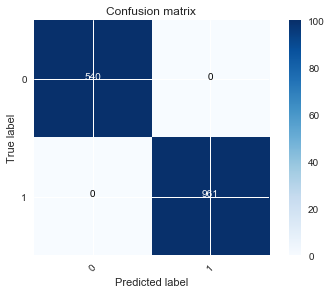

In [63]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_set,train_label)
y = clf.predict(test_set)
labels=[0,1]
cm = confusion_matrix(test_label,y)
plot_cm(cm, labels)

In [14]:
cond =df_data['label'] == 1
evil = df_data[:1500][cond]
legit =df_data[:1500][~cond]

In [15]:
len(legit)

540

In [61]:
test_abnormal_df = deal_with_conn_log("conn_2.log")

Successfully monitoring conn_2.log...


In [64]:
y = clf.predict(test_abnormal_df)

In [67]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [ ]:
line_dict={
'ts':'','uid':'','id.orig_h':'', 'id.orig_p':'','id.resp_h':'',	'id.resp_p':'',	'proto':'',	'service':'',	'duration':'',	'orig_bytes':'',	'resp_bytes':'',	'conn_state':'',	'local_orig':'',	'local_resp':'',	'missed_bytes':'','history':'','orig_pkts':'','orig_ip_bytes':'','resp_pkts':'',	'resp_ip_bytes':''	,'tunnel_parents':''}

In [ ]:
list(line_dict.keys())

In [ ]:
import time, os

#Set the filename and open the file
filename = '/usr/local/bro/logs/current/conn.log'
file = open(filename,'r')

#Find the size of the file and move to the end
st_results = os.stat(filename)
st_size = st_results[6]
file.seek(st_size)

while 1:
    where = file.tell()
    line = file.readline()
    if not line:
        time.sleep(1)
        file.seek(where)
    else:
        #("********************************************************************************")
       
        #print(line)
        #print(type(line))# already has newline
        line_list = re.split(r'\s+',line)
        if len(line_dict) == len(line_list)-1:
            print("I still work")
            #pass
        else:
            print(line_list)
            print("error")
            #print("sucess")
        #df = pd.DataFrame(line_list[:-1], columns=list(line_dict.keys()))
        #df['Date'] = pd.to_datetime(df['Date'])
        count = 0
        for i in line_dict.keys():
            line_dict[i] = line_list[count]
            count += 1
        if(line_dict['duration'] != '-' ):
        
            df = pd.DataFrame([line_dict])
            df = deal_with_conn_log(df)
            y = clf.predict(df)
            #if( y == 1):
            print(y)
            print(df)
            #print("ls")
#         else:
#             print("sssss")
        #print("lf")

In [12]:
import matplotlib.pyplot as plt
import pylab
import itertools
def plot_cm(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)

    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print("%s/%s: %.2f%% (%d/%d)" % (label_j, label_i, (percent[i][j]), cm[i][j], cm[i].sum()))
            

    plt.imshow(percent, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    normalize = False
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    pylab.show()



### 僵尸网络检测

### ICMP DDOS

In [26]:
bro_df = LogToDataFrame("conn_bot_training.log")

Successfully monitoring conn_bot_training.log...


In [27]:
bro_df["timestamp"] = [tm / np.timedelta64(1, 's') for tm in bro_df.ix[:,"duration"]]
bro_df = bro_df.drop(['duration'],axis=1)

In [28]:
bro_df.dtypes

conn_state         object
history            object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
local_orig           bool
local_resp           bool
missed_bytes        int64
orig_bytes          int64
orig_ip_bytes       int64
orig_pkts           int64
proto              object
resp_bytes          int64
resp_ip_bytes       int64
resp_pkts           int64
service            object
tunnel_parents     object
uid                object
timestamp         float64
dtype: object

In [29]:
bot_df = LogToDataFrame("CTU_dataset\conn_all.log")

Successfully monitoring CTU_dataset\conn_all.log...


In [30]:
bot_df= bot_df.reset_index(drop=True)  

In [31]:
bot_df["label"] = [ 0 for x in bot_df.ix[:,"conn_state"]]

In [32]:
All_data = pd.read_csv('CTU_dataset\capture20110818-2.binetflow.txt', sep=",")

In [33]:
All_data["label"] = [ 1 if x == 'flow=From-Botnet-V52-2-ICMP'  else  0 for x in All_data.ix[:,"Label"]]

In [34]:
cond = All_data['label'] == 1
evil = All_data[cond]
legit =All_data[~cond]

In [35]:
cond = legit['Proto'] == 'icmp'
legit_icmp = legit[cond]

In [36]:
def icmp_ddos_ddf(df):
    df = df.drop(['StartTime','Proto','Label','SrcAddr','DstAddr'],axis=1)
    df.ix[:,'Sport'] = df.ix[:,'Sport'].fillna(0)
    df['Sport'] = [int(str(x),16) for x in df.ix[:,'Sport']]
    df.ix[:,'Dport'] = df.ix[:,'Dport'].fillna(0)
    df['Dport'] = [int(str(x),16) for x in df.ix[:,'Dport']]
    df["Dir"] = df["Dir"].astype('category')
    df["Dir"]  = df["Dir"].cat.codes
    df["State"] = df["State"].astype('category')
    df["State"]  = df["State"].cat.codes
    df.ix[:,'sTos'] = df.ix[:,'sTos'].fillna(1)
    df.ix[:,'dTos'] = df.ix[:,'dTos'].fillna(1)
    df = df.reset_index(drop=True)
    return df

In [37]:
legit_icmp =  icmp_ddos_ddf(legit_icmp)
evil =  icmp_ddos_ddf(evil )

In [38]:
icmp_data = pd.concat([legit_icmp,evil])

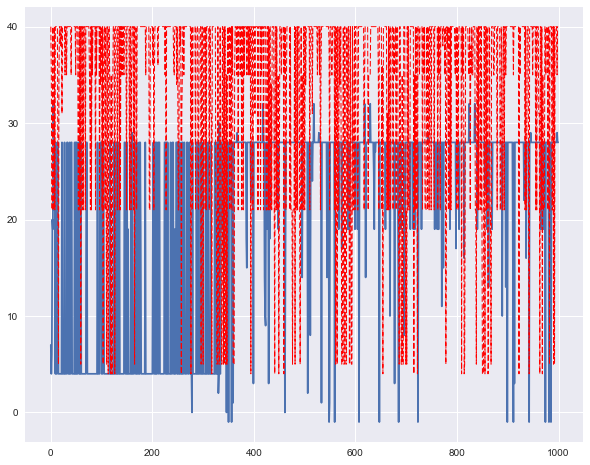

In [39]:
import numpy as np
X = np.arange(1000)
Y1 = np.array(legit_icmp['State'])[0:1000]
Y2 = np.array(evil['State'])[0:1000]   
plt.figure(num=3, figsize=(10, 8))
plt.plot(X, Y2)                                              #正常
plt.plot(X, Y1, color='red', linewidth=1.0, linestyle='--')  #ddos
plt.show()

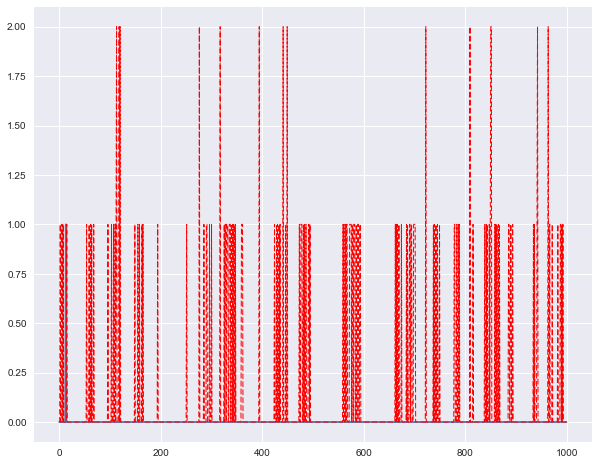

In [40]:
import numpy as np
X = np.arange(1000)
Y1 = np.array(legit_icmp['Dir'])[0:1000]
Y2 = np.array(evil['Dir'])[0:1000]   
plt.figure(num=3, figsize=(10, 8))
plt.plot(X, Y2)                                              #正常
plt.plot(X, Y1, color='red', linewidth=1.0, linestyle='--')  #ddos
plt.show()

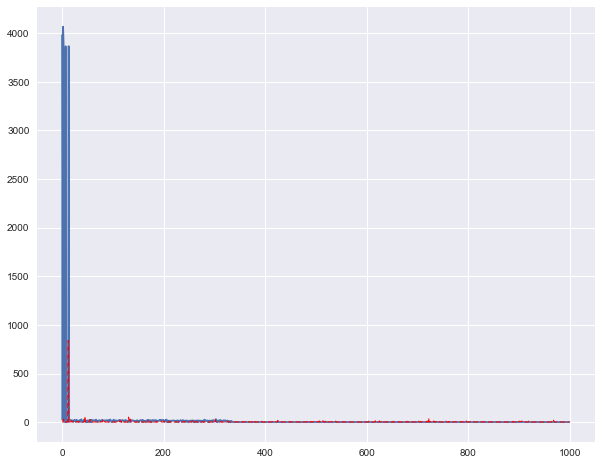

In [41]:
import numpy as np
X = np.arange(1000)
Y1 = np.array(legit_icmp['TotPkts'])[0:1000]
Y2 = np.array(evil['TotPkts'])[0:1000]   
plt.figure(num=3, figsize=(10, 8))
plt.plot(X, Y2)                                              #正常
plt.plot(X, Y1, color='red', linewidth=1.0, linestyle='--')  #ddos
plt.show()

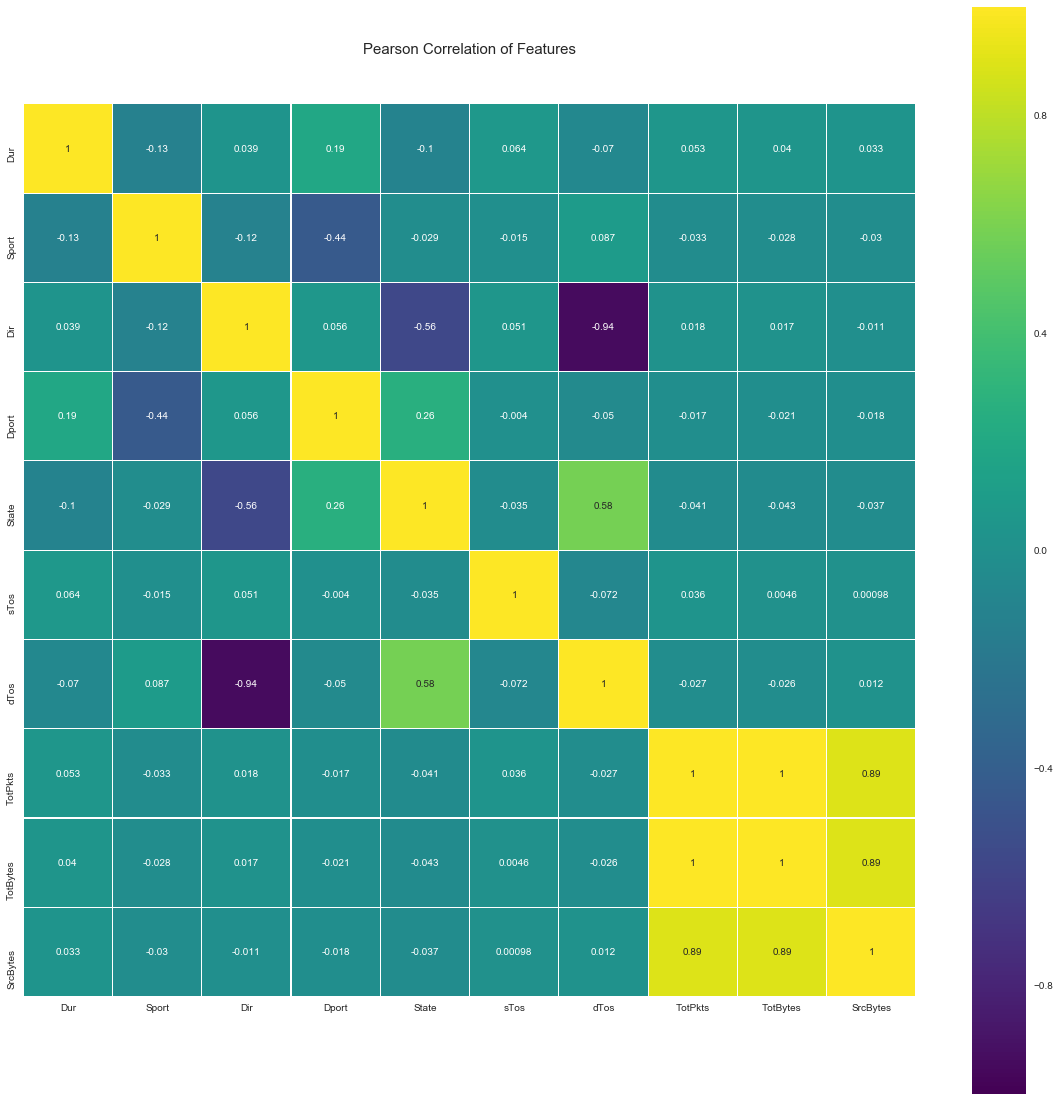

In [45]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(icmp_data_train_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [43]:
icmp_data = icmp_data.sample(frac=1).reset_index(drop=True) 

In [44]:
# icmp_data_train_set = icmp_data.ix[:5000,['Dur','State']]
icmp_data_train_set = icmp_data.ix[:5000,:-1]
icmp_data_train_label = icmp_data.ix[:5000,[-1]]
# icmp_data_test_set = icmp_data.ix[5000:,['Dur','State']]
icmp_data_test_set = icmp_data.ix[5000:,:-1]
icmp_data_test_label = icmp_data.ix[5000:,[-1]]

In [ ]:
test_all  = icmp_data.ix[5000:,:]
cond = test_all ['label'] == 1
evil = test_all [cond]
legit =test_all [~cond]

In [ ]:
legit

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(icmp_data_set)

In [ ]:
label_list = list(icmp_data ['label'])

In [ ]:
sum(label_list == kmeans.labels_)

In [46]:
icmp_data_test_set = icmp_data_test_set.drop(['Dir','sTos','dTos','TotPkts','TotBytes','Sport','SrcBytes','Dport'],axis=1)

In [47]:
icmp_data_train_set = icmp_data_train_set.drop(['Dir','sTos','dTos','TotPkts','TotBytes','Sport','SrcBytes','Dport'],axis=1)

In [49]:
icmp_data_test_set

,Dur,State
5000,0.000000,25
5001,5.990574,35
5002,0.000310,31
5003,0.000000,32
5004,0.000000,32
5005,90.087326,28
5006,0.000000,35
5007,0.000000,28
5008,90.575623,4
5009,0.000294,31


0/0: 96.34% (5189/5386)
1/0: 3.66% (197/5386)
0/1: 6.37% (154/2419)
1/1: 93.63% (2265/2419)


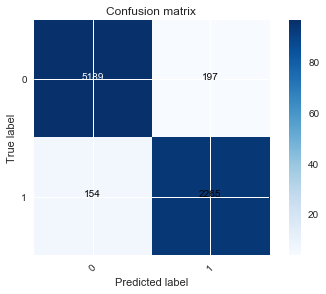

In [51]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


clf = tree.DecisionTreeClassifier()
clf = clf.fit(icmp_data_train_set ,icmp_data_train_label)

y = clf.predict(icmp_data_test_set)
labels=[0,1]
cm = confusion_matrix(icmp_data_test_label,y)
plot_cm(cm, labels)

In [52]:
clf.feature_importances_

array([ 0.09188468,  0.90811532])

### 下载器行为检测  （下载行为检测）

- 自制数据集 

In [55]:
import os  
import re
path = r"E:\CodingCollection\SharePath\ns_work_training\extract_files" #文件夹目录  
files= os.listdir(path) #得到文件夹下的所有文件名称  

In [56]:
len(files)

2663

In [95]:
file_log_df= LogToDataFrame(r'E:\CodingCollection\SharePath\ns_work_training\files.log')

Successfully monitoring E:\CodingCollection\SharePath\ns_work_training\files.log...


In [96]:
file_log_df

,analyzers,conn_uids,depth,duration,extracted,filename,fuid,is_orig,local_orig,md5,...,overflow_bytes,parent_fuid,rx_hosts,seen_bytes,sha1,sha256,source,timedout,total_bytes,tx_hosts
ts,,,,,,,,,,,,,,,,,,,,,
2011-08-10 17:06:36.150781,"SHA1,EXTRACT,PE,MD5",C14VVp1uo8D1pNvJCf,0,00:00:00.108116,extract-1312967196.150781-HTTP-FvlEfO2PWM8fJKRMP6,-,FvlEfO2PWM8fJKRMP6,False,False,7958e7f604474414668c04a9a0c0cf19,...,0,-,147.32.84.180,25600,b69c1ae6c700f66ad8f035a9d8769b6785e055b8,-,HTTP,False,25600,94.63.149.152
2011-08-10 17:06:39.024397,"SHA1,EXTRACT,PE,MD5",CwA9Xo4Qf7ldfj9chc,0,00:00:01.618976,extract-1312967199.024397-HTTP-FOmGJb2hVXsdYVlQNc,-,FOmGJb2hVXsdYVlQNc,False,False,b97c7518b86a4f1a884bb983cbbbd5cc,...,0,-,147.32.84.180,55808,fd130a11fbe4ac51efec75d050dc362002005afe,-,HTTP,False,55808,60.190.223.75
2011-08-10 17:06:43.161675,"SHA1,EXTRACT,MD5",CHJDm64kfvYeeFvEF2,0,00:00:00,extract-1312967203.161675-HTTP-F2M0ZOWpOlKuuzfn6,-,F2M0ZOWpOlKuuzfn6,False,False,3d5db1a21a1b4b09e1b1b67e01263669,...,0,-,147.32.84.180,1536,484aeda47a91da1ab847bf8fdf0848f4200d6783,-,HTTP,False,1536,60.190.223.75
2011-08-10 17:06:44.653229,"SHA1,EXTRACT,PE,MD5",Cp7s9I27xtsJ4glfkf,0,00:00:02.628153,extract-1312967204.653229-HTTP-FBMl8KFQhB9HCYsw1,-,FBMl8KFQhB9HCYsw1,False,False,6621df15ee28e5516db8db4082205217,...,0,-,147.32.84.180,128512,02111af926100a88f0972c5f1fee17850f21e616,-,HTTP,False,128512,122.224.6.164
2011-08-10 17:06:52.264104,"SHA1,EXTRACT,MD5",CaUmX819S0ZEEprIii,0,00:00:00,extract-1312967212.264104-HTTP-FsAkTxGAILIRONUUc,-,FsAkTxGAILIRONUUc,False,False,b5f3729e5418905ad2b21ce186b1c01d,...,0,-,147.32.84.180,2,a162caffcb6897220f4d1cf28164d73cb91993a8,-,HTTP,False,0,60.190.223.75
2011-08-10 17:06:50.346139,"SHA1,EXTRACT,PE,MD5",CtwIxy3vW2hhcAIUmd,0,00:00:02.886620,extract-1312967210.346139-HTTP-Fw4QdY17yfSX9lJBMi,-,Fw4QdY17yfSX9lJBMi,False,False,564048b35da9d447f2e861d5896d908d,...,0,-,147.32.84.180,37376,2a6d5ad9a782c96f9cd214fcd105056248e6df31,-,HTTP,False,37376,195.88.191.59
2011-08-10 17:06:53.645653,"SHA1,EXTRACT,MD5",CZ1lnc3ZPpj0vL9wGh,0,00:00:00,extract-1312967213.645653-HTTP-FsVQsw4K00iVzm8mCc,-,FsVQsw4K00iVzm8mCc,False,False,b5f3729e5418905ad2b21ce186b1c01d,...,0,-,147.32.84.180,2,a162caffcb6897220f4d1cf28164d73cb91993a8,-,HTTP,False,0,60.190.223.75
2011-08-10 17:06:54.359906,"SHA1,EXTRACT,MD5",CbnaBN3YQPOPj8HjJk,0,00:00:00.205488,extract-1312967214.359906-HTTP-F2GX7B4m2NyL4l1yQ1,-,F2GX7B4m2NyL4l1yQ1,False,False,f0f766295fc65094ab786287331775e3,...,0,-,147.32.84.180,8704,b665531cbb644cc56cb260aec77adb6d01f0c682,-,HTTP,False,0,94.63.150.20
2011-08-10 17:06:54.560098,"SHA1,EXTRACT,PE,MD5",Cn1Cie2gzsLsNvsnb3,0,00:00:01.479241,extract-1312967214.560098-HTTP-Fxy97QpdVf772oQPi,-,Fxy97QpdVf772oQPi,False,False,69f32b85f1de3c41948ae51b4ba3f4bb,...,0,-,147.32.84.180,34304,ae96df530701c39443999d6cfa4a68b9e8d34268,-,HTTP,False,34304,61.147.99.179


In [97]:
file_log_list = list(file_log_df.ix[:,'conn_uids'])

#####  存在一个会话多个文件的情况

In [68]:
conn_log_df = LogToDataFrame(r"E:\CodingCollection\SharePath\ns_work_training\conn_bot_training.log")

Successfully monitoring E:\CodingCollection\SharePath\ns_work_training\conn_bot_training.log...


In [85]:
conn_log_df 

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,uid,label
0,OTH,00:00:00,A,192.168.1.103,3058,128.242.245.116,80,False,False,0,...,40,1,tcp,0,0,0,-,(empty),CNGhs14bzsgNMyCsc,0
1,OTH,00:00:00,D,192.168.5.122,7589,192.168.4.118,1163,False,False,0,...,235,1,tcp,0,0,0,-,(empty),CwFK3P1y03cm9wnOTg,0
2,OTH,00:00:00,A,172.16.2.2,1097,195.50.87.130,80,False,False,0,...,40,1,tcp,0,0,0,-,(empty),CXbcb5239Fgsp8rHFh,0
3,S0,00:00:03.008878,S,147.32.84.180,2141,205.188.146.193,25,False,False,0,...,192,4,tcp,0,0,0,-,(empty),CheaeZ2Uyq1cFcUJMc,0
4,OTH,00:00:00,^d,192.168.2.109,4238,12.180.55.140,80,False,False,0,...,0,0,tcp,0,1420,1,-,(empty),Cduxin34kaWyp1Ylt4,0
5,OTH,00:00:00,^d,192.168.4.118,1590,125.6.164.43,80,False,False,0,...,0,0,tcp,0,430,1,-,(empty),CXpyk31t6X9knU5THj,0
6,S0,00:00:03.002447,S,147.32.84.170,3094,217.191.30.108,22,False,False,0,...,192,4,tcp,0,0,0,-,(empty),C79IyTP7auwyNabS1,0
7,OTH,00:00:00,^d,192.168.2.112,4895,192.168.5.122,22,False,False,0,...,0,0,tcp,0,824,1,-,(empty),CNnERMnfl4QUx3YI9,0
8,OTH,00:00:00,^d,192.168.2.112,1834,68.178.178.97,80,False,False,0,...,0,0,tcp,0,1420,1,-,(empty),CR8MT12eZEiuo7j6E2,0
9,OTH,00:00:00,D,192.168.2.110,2490,12.129.19.135,80,False,False,0,...,103,1,tcp,0,0,0,-,(empty),C4L1fC4bx5Hure5Oe1,0


In [99]:
conn_log_df['label'] = [ 1  if x in file_log_list else 0 for x in conn_log_df.ix[:,'uid']]

In [70]:
conn_log_df= conn_log_df.sample(frac=1).reset_index(drop=True) 

In [100]:
cond = conn_log_df['label'] == 1
evil = conn_log_df[cond]
legit =conn_log_df[~cond]

In [101]:
evil 

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,uid,label
327,SF,00:03:30.108947,ShADaFdRf,147.32.84.180,1904,174.133.57.141,80,False,False,0,...,1212,12,tcp,287,495,5,http,(empty),CG82rG2dGeJHwF3eHg,1
4086,RSTO,00:00:10.979843,ShADadfR,147.32.84.180,2169,173.192.170.88,80,False,False,0,...,1202,12,tcp,1579,1747,4,http,(empty),CGfRKd3gLYIfA3pvRi,1
6089,SF,00:00:00.323675,ShADdfFa,147.32.84.180,4682,174.133.57.141,80,False,False,0,...,1212,12,tcp,1765,1933,4,http,(empty),CKfMCQ20W9ZPPjTd95,1
7751,RSTO,00:00:16.846267,ShADdfR,147.32.84.180,3702,98.126.71.122,80,False,False,0,...,1174,14,tcp,3203,3371,4,http,(empty),CZY6os4h5m8gWrLkl1,1
10153,SF,00:00:10.807912,ShADdtfFrr,147.32.84.191,1075,124.232.159.250,80,False,False,0,...,4722,48,tcp,29917,32225,21,http,(empty),C7kCZy11kbELp2jxN9,1
10322,RSTO,00:00:01.170304,ShADdR,147.32.84.180,4304,74.217.252.37,80,False,False,0,...,1102,10,tcp,683,767,2,http,(empty),CoEwHn3J5NVh1h5Kf1,1
11051,RSTO,00:00:12.893870,ShADdfR,147.32.84.165,1081,116.55.241.240,80,False,False,0,...,5404,46,tcp,30736,31144,10,http,(empty),C5Okrv27NWPrTeCwP6,1
11570,SF,00:00:03.970605,ShADadFf,147.32.84.160,1733,64.4.56.87,80,False,False,0,...,14702,94,tcp,90783,92791,50,http,(empty),CXUmiF3e8rWZ2j2nv,1
12793,SF,00:00:05.249217,ShADadFf,147.32.84.180,2520,174.133.57.141,80,False,False,0,...,1212,12,tcp,1765,1973,5,http,(empty),CkGHri10IDBCtTPOM6,1
15730,SF,00:00:01.006227,ShADadfF,147.32.84.160,1413,64.4.56.103,80,False,False,0,...,5476,18,tcp,7969,8377,10,http,(empty),Cl0FeQ3lpYvI7Pn7H3,1


In [102]:
legit_part = legit.ix[:4000,:]

In [103]:
merge_df = pd.concat([legit_part,evil])

In [104]:
merge_df= merge_df.sample(frac=1).reset_index(drop=True) 

In [117]:
merge_df

,conn_state,duration,history,id.orig_h,id.orig_p,id.resp_h,id.resp_p,local_orig,local_resp,missed_bytes,...,orig_ip_bytes,orig_pkts,proto,resp_bytes,resp_ip_bytes,resp_pkts,service,tunnel_parents,uid,label
0,OTH,00:00:00,A,192.168.4.120,2795,72.21.202.165,80,False,False,0,...,40,1,tcp,0,0,0,-,(empty),CuNtEYcgoboF4Cgk4,0
1,OTH,00:00:00,A,172.16.2.13,1880,194.95.236.6,80,False,False,0,...,40,1,tcp,0,0,0,-,(empty),Ck1Uzg2fq5p9uwLrJ7,0
2,SF,00:00:53.474434,ShADadfF,147.32.84.191,1116,219.153.76.26,80,False,False,0,...,46908,528,tcp,463373,479309,385,http,(empty),CZwwmtGBu4rkh2er2,1
3,S0,00:00:00,D,192.168.2.113,3031,192.168.5.122,53,False,False,0,...,63,1,udp,0,0,0,dns,(empty),CV5eZpeC69V5SZORd,0
4,OTH,00:00:00,^d,192.168.4.120,2566,68.142.205.139,80,False,False,0,...,0,0,tcp,0,1500,1,-,(empty),Cvs1kX2SUjiL7FXPmc,0
5,SF,00:00:32.922867,ShAdDaFf,147.32.84.160,2043,64.12.168.40,587,False,False,0,...,6992,48,tcp,991,2119,28,smtp,(empty),CSrjrGvdNtjM6tGud,1
6,OTH,00:00:00,^d,192.168.2.107,1060,65.54.81.10,80,False,False,0,...,0,0,tcp,0,1500,1,-,(empty),CpdfrL7rYUdmXXFPh,0
7,SF,00:00:24.818581,ShAdDafF,147.32.84.160,1505,64.12.175.136,587,False,False,0,...,13118,70,tcp,1154,2802,41,smtp,(empty),CD9Syt4iy9GVTmiNL7,1
8,RSTO,00:01:21.373366,ShADdR,147.32.84.165,1062,122.227.164.5,80,False,False,0,...,1578,10,tcp,603,691,2,http,(empty),CwU54RiD4GalvOeN3,1
9,OTH,00:00:00,^d,192.168.1.105,16952,66.43.22.49,80,False,False,0,...,0,0,tcp,0,1500,1,-,(empty),C2IjGF15wJopejmKDe,0


In [118]:
train_set = merge_df.ix[:2500,:-1]
test_set = merge_df.ix[2500:,:-1]
train_label =  merge_df.ix[:2500,[-1]]
test_label =  merge_df.ix[2500:,[-1]]

In [119]:
def deal_with_download_df(df):
    df = df.drop(['id.orig_h'],axis=1)
    df = df.drop(['uid'],axis=1)
    df["timestamp"] = [tm / np.timedelta64(1, 's') for tm in df.ix[:,"duration"]]
    df = df.drop(['duration'],axis=1)
    df  = deal_with_string('conn_state',df)
    df  = deal_with_string('history',df)
    df  = deal_with_string('id.resp_h',df)
    df  = deal_with_string('local_orig',df)
    df  = deal_with_string('local_resp',df)
    df  = deal_with_string('proto',df)
    df  = deal_with_string('service',df)
    df  = deal_with_string('tunnel_parents',df)
    return df

In [120]:
def deal_with_string(header_name,df):
    df[header_name] = df[header_name].astype('category')
    df[header_name]  = df[header_name].cat.codes
    return df

In [121]:
train_set = deal_with_download_df(train_set)
test_set = deal_with_download_df(test_set)

In [ ]:
##conn_state duration history id.orig_p id.resp_h id.resp_p local_orig 
##local_resp missed_bytes orig_bytes orig_ip_bytes orig_pkts proto resp_bytes
##resp_ip_bytes resp_pkts service tunnel_parents uid

0/0: 99.59% (2180/2189)
1/0: 0.41% (9/2189)
0/1: 0.00% (0/828)
1/1: 100.00% (828/828)


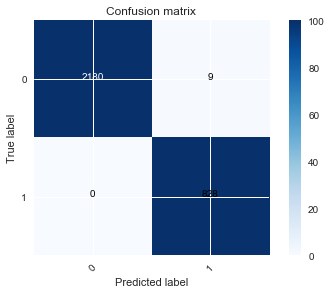

In [122]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_set,train_label)
y = clf.predict(test_set)
labels=[0,1]
cm = confusion_matrix(test_label,y)
plot_cm(cm, labels)

In [123]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf.feature_importances_ 

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.22300181e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.87805174e-03,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         9.97999648e-01,   0.00000000e+00,   0.00000000e+00])